<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

# **Extração e Pré-processamento de Dados**

---


### **Arquivo JSON**

O **JSON** (*JavaScript Object Notation*) é um formato de arquivo para manter e trocar informações legíveis pelas pessoas. O arquivo contém apenas texto e usa a extensão *.json*.

O JSON é um formato que armazena informações estruturadas e é principalmente usado para transferir dados entre um servidor e um cliente.

O arquivo é basicamente uma alternativa simples e mais leve ao XML (*Extensive Markup Language*), que tem funções similares.

Para ler um documento JSON disponível na web em Python, você pode usar a biblioteca `requests` para fazer uma requisição HTTP ao URL do documento JSON e, em seguida, a biblioteca `json` para analisar o conteúdo da resposta JSON. Aqui está um exemplo de código:

https://quotes.rest/qod.json

**Aula 04 - Extração e Pré-processamento de Dados**

> https://github.com/adalves-ufabc/2023.Q1-PLN





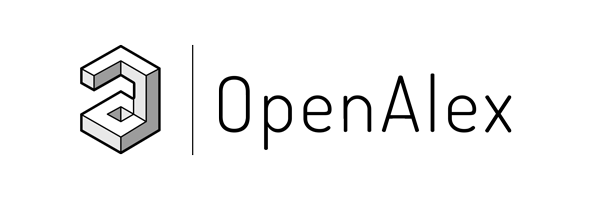

O **OpenAlex** cataloga centenas de milhões de documentos científicos e estabelece conexões entre eles. Foi lançado um ambicioso índice gratuito com mais de 200 milhões de documentos científicos que cataloga fontes de publicação, informações de autores e tópicos de pesquisa.

In [ ]:
import requests

# URL do arquivo JSON
url = 'https://api.openalex.org/institutions/I27837315'

# Faz uma solicitação GET
response = requests.get(url)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
  print('Conexão bem-sucedida')

Conexão bem-sucedida


In [ ]:
  print(response.text)

{"id":"https://openalex.org/I27837315","ror":"https://ror.org/00jmfr291","display_name":"University of Michigan\u2013Ann Arbor","country_code":"US","type":"education","lineage":["https://openalex.org/I27837315"],"homepage_url":"https://www.umich.edu/","image_url":"https://commons.wikimedia.org/w/index.php?title=Special:Redirect/file/University%20of%20Michigan%20logo.svg","image_thumbnail_url":"https://commons.wikimedia.org/w/index.php?title=Special:Redirect/file/University%20of%20Michigan%20logo.svg&width=300","display_name_acronyms":["UM"],"display_name_alternatives":["UMich"],"repositories":[{"id":"https://openalex.org/S4306400393","display_name":"Deep Blue (University of Michigan)","host_organization":"https://openalex.org/I27837315","host_organization_name":"University of Michigan\u2013Ann Arbor","host_organization_lineage":["https://openalex.org/I27837315"]},{"id":"https://openalex.org/S4306400708","display_name":"CINECA IRIS Institutional Research Information System (IRIS Istitut

In [ ]:
import requests
import json

# URL do arquivo JSON
url = 'https://api.openalex.org/institutions/I27837315'

# fazer uma requisição HTTP ao URL e obter a resposta
response = requests.get(url)

# verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    # analisar o conteúdo da resposta JSON
    data = json.loads(response.content)

    # imprimir o conteúdo do arquivo
    print(data)
else:
    # imprimir uma mensagem de erro se a requisição falhou
    print(f'A requisição falhou com código de status {response.status_code}.')


{'id': 'https://openalex.org/I27837315', 'ror': 'https://ror.org/00jmfr291', 'display_name': 'University of Michigan–Ann Arbor', 'country_code': 'US', 'type': 'education', 'lineage': ['https://openalex.org/I27837315'], 'homepage_url': 'https://www.umich.edu/', 'image_url': 'https://commons.wikimedia.org/w/index.php?title=Special:Redirect/file/University%20of%20Michigan%20logo.svg', 'image_thumbnail_url': 'https://commons.wikimedia.org/w/index.php?title=Special:Redirect/file/University%20of%20Michigan%20logo.svg&width=300', 'display_name_acronyms': ['UM'], 'display_name_alternatives': ['UMich'], 'repositories': [{'id': 'https://openalex.org/S4306400393', 'display_name': 'Deep Blue (University of Michigan)', 'host_organization': 'https://openalex.org/I27837315', 'host_organization_name': 'University of Michigan–Ann Arbor', 'host_organization_lineage': ['https://openalex.org/I27837315']}, {'id': 'https://openalex.org/S4306400708', 'display_name': 'CINECA IRIS Institutional Research Inform

In [ ]:
print(json.dumps(data, indent = 4))

In [ ]:
# Extrair conteúdo
data['display_name']

'University of Michigan–Ann Arbor'

In [ ]:
# Extrair atributos
print(data['repositories'][0]['id'])

https://openalex.org/S4306400393


In [ ]:
print(data['repositories'][1]['id'])

https://openalex.org/S4306400708


### **Página HTML**

Vamos ver agora um exemplo em Python para fazer um parser em uma página da Wikipedia usando a biblioteca `BeautifulSoup` para extrair o conteúdo desejado.

Suponha que você queira extrair a lista de países da página da Wikipedia sobre a América do Sul: https://pt.wikipedia.org/wiki/Am%C3%A9rica_do_Sul

Para fazer isso, podemos usar o seguinte código em Python:

In [ ]:
import requests
from bs4 import BeautifulSoup

# faz a requisição à página da Wikipedia
response = requests.get('https://pt.wikipedia.org/wiki/Am%C3%A9rica_do_Sul')

# cria um objeto BeautifulSoup para parsear o HTML
soup = BeautifulSoup(response.content, 'html.parser')

# encontra a tabela com a lista de países
tabela_paises = soup.find('table', {'class': 'wikitable sortable'})

# encontra as linhas da tabela
linhas = tabela_paises.find_all('tr')

# percorre as linhas, extraindo o nome do país de cada célula da primeira coluna
paises = []
for linha in linhas[1:]:
    celulas = linha.find_all('td')
    nome_pais = celulas[0].text.strip()
    paises.append(nome_pais)

# imprime a lista de países
print(paises)

['Argentina', 'Aruba (\xa0Países Baixos) *', 'Bolívia', 'Bonaire (\xa0Países Baixos) **', 'Brasil', 'Chile', 'Colômbia', 'Curaçao (\xa0Países Baixos) *', 'Equador', 'Guiana', 'Guiana Francesa (\xa0França) **', 'Ilhas Malvinas (\xa0Reino Unido)*', 'Ilhas Geórgia do Sul e Sandwich do Sul (\xa0Reino Unido) *', 'Paraguai', 'Peru', 'Suriname', 'Trinidad e Tobago', 'Uruguai', 'Venezuela']


Nesse exemplo, a variável `response` guarda a resposta da requisição à página, e a variável `soup` guarda o objeto `BeautifulSoup` criado a partir do conteúdo HTML da página. Depois, usamos o método `find` para encontrar a tabela com a lista de países, a função `find_all` para encontrar todas as linhas da tabela, e um loop para percorrer as linhas e extrair o nome de cada país da primeira célula de cada linha. Por fim, imprimimos a lista de países.

Suponha que você queira obter o conteúdo da página da Wikipedia em português sobre inteligência artificial: https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial

In [ ]:
import requests
from bs4 import BeautifulSoup

# faz a requisição à página da Wikipedia
response = requests.get('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

# cria um objeto BeautifulSoup para parsear o HTML
soup = BeautifulSoup(response.content, 'html.parser')

# encontra a seção do conteúdo da página
conteudo = soup.find('div', {'id': 'mw-content-text'})

# encontra todos os parágrafos de texto dentro da seção de conteúdo
paragrafos = conteudo.find_all('p')

In [ ]:
# número de parágrafos
print(len(paragrafos))

109


In [ ]:
# primeiro parágrafo
print(paragrafos[0])

<p><b>Inteligência artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>Artificial Intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span>[</span>1<span>]</span></a></sup> Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. Algumas das principais áreas relacionadas à IA incluem:
</p>


In [ ]:
# primeiro parágrafo - texto
print(paragrafos[0].get_text())

Inteligência artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. Algumas das principais áreas relacionadas à IA incluem:



In [ ]:
# listar todos os parágrafos
for p in paragrafos:
   print(p.getText())

In [ ]:
# obter todo o texto
texto = ''

for p in paragrafos:
   texto += p.getText()

print(texto)

In [ ]:
# imprime as primeiras n palavras dos parágrafos

n_palavras = 10
palavras_impressas = 0

for p in paragrafos:

    # separa as palavras do parágrafo
    palavras = p.get_text().split()

    palavras_para_imprimir = n_palavras - palavras_impressas
    if len(palavras) > palavras_para_imprimir:
        palavras = palavras[:palavras_para_imprimir]

    print(' '.join(palavras))

    palavras_impressas += len(palavras)
    if palavras_impressas >= n_palavras:
        break

Inteligência artificial (de sigla: IA; do inglês: Artificial Intelligence, de


Neste exemplo, vamos obter o título e o texto da seção principal de um artigo da Wikipedia em português, utilizando a página sobre a cidade de Nova Iorque (https://pt.wikipedia.org/wiki/Nova_Iorque).

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://pt.wikipedia.org/wiki/Nova_Iorque'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar o título da página
title = soup.find('h1', {'class': 'firstHeading'}).text
print(title)

Nova Iorque


In [ ]:
# Encontrar a seção principal
content = soup.find('div', {'id': 'mw-content-text'})
section = content.find('div', {'class': 'mw-parser-output'})

# Encontrar o texto da seção principal
text = ''
for p in section.find_all('p', recursive=False):
    text += p.text
    if p.find('a'):
        break

print(text)

Nova Iorque (também referida como Nova York), oficialmente Cidade de Nova Iorque (em inglês:  New York City),[6] é a cidade mais populosa do estado de Nova Iorque e dos Estados Unidos.[5] Sua região metropolitana é uma das áreas metropolitanas mais populosas do mundo[7][8][9] e é também a terceira cidade mais populosa da América, atrás de São Paulo e Cidade do México. A cidade exerce um impacto significativo sobre o comércio, finanças, mídia, arte, moda, pesquisa, tecnologia, educação e entretenimento de todo o planeta.



#### **Web Scraping**

**Web scraping** é a prática de coletar automaticamente dados de uma página da web, analisando seu conteúdo HTML. Essa técnica é utilizada para extrair informações específicas de uma página web, como preços de produtos em lojas online, informações de contato de empresas ou dados de preços de ações em sites financeiros.

https://scrapeops.io/web-scraping-playbook/403-forbidden-error-web-scraping/

In [ ]:
url = 'http://www.imdb.com/chart/top'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

# Verifica se a solicitação foi bem-sucedida
if not response.status_code == 200:
  print(response.text)

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>



In [ ]:
url = 'http://www.imdb.com/chart/top'

HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

response = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(response.text, 'lxml')

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
  print('Conexão bem-sucedida')

Conexão bem-sucedida


In [ ]:
import requests
import random

user_agents_list = [
    'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
]

url = 'http://www.imdb.com/chart/top'

response = requests.get(url, headers={'User-Agent': random.choice(user_agents_list)})

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
  print('Conexão bem-sucedida')

Conexão bem-sucedida


In [ ]:
import requests

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

url = 'http://www.imdb.com/chart/top'

response = requests.get(url, headers=HEADERS)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
  print('Conexão bem-sucedida')

Conexão bem-sucedida


**Notícias de Tecnologia**

Aqui está outro exemplo de web scraping em Python que usa a biblioteca `requests` e a biblioteca `BeautifulSoup` para extrair informações sobre notícias de tecnologia do site TechCrunch:

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://techcrunch.com/'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.select('.post-block__title__link')

for article in articles:
    title = article.text.strip()
    link = article['href']
    print(f'{title} - {link}')

Microsoft won’t say if its products were exploited by spyware zero-days - https://techcrunch.com/2023/10/04/microsoft-wont-say-if-its-products-were-exploited-by-spyware-zero-days/
 - https://techcrunch.com/2023/10/04/microsoft-wont-say-if-its-products-were-exploited-by-spyware-zero-days/
Bird lays off staff after Spin acquisition to reduce redundancies - https://techcrunch.com/2023/10/04/bird-lays-off-staff-after-spin-acquisition-to-reduce-redundancies/
Patreon launches new features, a redesigned app and a new look - https://techcrunch.com/2023/10/04/patreon-launches-new-features-a-redesigned-app-and-a-new-look/
Microsoft won’t say if its products were exploited by spyware zero-days - https://techcrunch.com/2023/10/04/microsoft-wont-say-if-its-products-were-exploited-by-spyware-zero-days/
Walmart experiments with generative AI tools that can help you plan a party or decorate - https://techcrunch.com/2023/10/04/walmart-experiments-with-new-generative-ai-tools-that-can-help-you-plan-a-pa

Neste exemplo, fazemos uma solicitação HTTP para a página inicial do TechCrunch e usamos a biblioteca `BeautifulSoup` para analisar o conteúdo HTML da página e encontrar os elementos HTML que contêm as informações de título e link de cada artigo.

Usamos o método `select()` do `BeautifulSoup` para selecionar os elementos HTML que contêm as informações relevantes e, em seguida, usamos o método `text` e `['href']` para extrair as informações de título e link, respectivamente.

Por fim, imprimimos o título e link de cada artigo na tela.

#### **Expressões Regulares**

Aqui está um exemplo de código em Python que usa a biblioteca `requests` e a biblioteca `BeautifulSoup` para obter o conteúdo de um livro do **Projeto Gutenberg** e contar o número de palavras que terminam com "mento":

**TESTE**: "mento", "agem" e "ção". Qual ocorre mais?

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# URL do livro no Projeto Gutenberg
# Dom Casmurro , de Machado de Assis
url = 'https://www.gutenberg.org/files/55752/55752-h/55752-h.htm'

# Faz a solicitação HTTP para obter o conteúdo HTML da página do livro
response = requests.get(url)

# Cria um objeto BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Encontra o elemento HTML que contém o texto do livro
book_text = soup.find('body')

# Extrai o texto do livro a partir do elemento HTML
book = book_text.get_text()

# Conta o número de palavras que terminam com "mento"
words_amento = re.findall(r'\b\w+mento\b', book)
count_amento = len(words_amento)

print(f'O número de palavras que terminam com "mento" é {count_amento}.')

O número de palavras que terminam com "mento" é 92.


In [ ]:
import requests
import re

# URL do livro no Projeto Gutenberg
# Dom Casmurro , de Machado de Assis
url = 'https://www.gutenberg.org/cache/epub/55752/pg55752.txt'

# Faz o download do arquivo
response = requests.get(url)

# Abre o arquivo em modo escrita binária e escreve o conteúdo
with open('livro.txt', 'wb') as file:
    file.write(response.content)

# Abre o arquivo do livro em modo leitura
with open('livro.txt', 'r') as file:
    book = file.read()

# Conta o número de palavras que terminam com "mento"
words_amento = re.findall(r'\b\w+mento\b', book)
count_amento = len(words_amento)

print(f'O número de palavras que terminam com "mento" é {count_amento}.')

O número de palavras que terminam com "mento" é 92.


Um exemplo de como extrair todos os anos que aparecem no texto:

In [ ]:
import requests
import re

# URL do livro no Projeto Gutenberg
url = 'https://www.gutenberg.org/cache/epub/55752/pg55752.txt'

# Faz o download do livro em formato TXT
response = requests.get(url)
book = response.text

# Busca por todas as sequências de quatro dígitos no texto do livro
all_years = re.findall(r'\b\d{4}\b', book)

# Filtra apenas os anos válidos (entre 1500 e 2023, por exemplo)
valid_years = [y for y in all_years if 1500 <= int(y) <= 2023]

# Remove anos duplicados
unique_years = set(valid_years)

# Ordena os anos em ordem crescente
sorted_years = sorted(unique_years)

print(f'Todos os anos que aparecem no livro são: {sorted_years}.')

Todos os anos que aparecem no livro são: ['1500', '1824', '1825', '1851', '1857', '1858', '1859', '1860', '1865', '1871', '1872', '1882', '1887', '2001', '2017'].


### **Google Drive**

In [ ]:
import pandas as pd

# Define a URL do arquivo CSV hospedado no Google Drive
# Pizzaria.csv - UFABC_PLN
url = 'https://docs.google.com/spreadsheets/d/1lEsYaFcs2lirK-QFI-dhQVdizXx0J861c5qwNgx8PFY/export?format=csv'

# Carrega o conteúdo do arquivo CSV em um DataFrame do Pandas
df = pd.read_csv(url)

# Exibe as primeiras linhas do DataFrame
print(df.head())


   Pedido      Nome             Status
0       1     Pedro         que pedido
1       2     Maria  Saiu para entrega
2       3      alex  saiu para entrega
3       4    alexdd          esperando
4       1  fernando         que pedido


In [ ]:
import pandas as pd

# UFABC_PGC
# ufsc_tcc_computacao.xlsx

# Na URL da planilha que está armazenada no Google Drive, obter o id:
#                                    --> id                               --> fim id
# https://docs.google.com/spreadsheets/d/1RlBeFCnu3DImX-0zWP3i4rbD0CMowcac/edit?usp=share_link&ouid=115032225044325641900&rtpof=true&sd=true

fileid = "1RlBeFCnu3DImX-0zWP3i4rbD0CMowcac"

# Lendo a planilha do Excel em um DataFrame do Pandas

df = pd.read_excel(
    "https://drive.google.com/uc?export=download&id={fileid}".format(
        fileid=fileid
    )
)

# selecionar a coluna 'idade' usando colchetes
titulo = df['Title']

print(titulo)

0      Classificação de Litofácies Utilizando Transfo...
1      Classificação de gêneros musicais por análise ...
2      Implementing a programming language with a dep...
3      Explorando Árvores de Decisão Em Um Fluxo de S...
4      Desenvolvimento de um Modelo de Avaliação da O...
                             ...                        
780    Desenvolvimento de uma abordagem de cooperação...
781    Goftester: aprimoramento e implementação da bi...
782    Métodos de Autofoco para Holografia Digital In...
783    Módulo de jogo de perguntas e respostas online...
784    Integração de um tracking magnético a um simul...
Name: Title, Length: 785, dtype: object
